In [1]:
import pandas as pd

In [28]:
data = pd.read_csv("recommendation_output.xlsx")

In [29]:
df = data.copy()

In [31]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None) 

In [35]:
df.head(2)

,asin,title,description,category,also_buy,category_1,category_2,category_3,category_4,available_also_buy,recommend_product_asin,recommend_product_asin_category,recommendation_same_or_not,recommendation_same_category,recommendation_different_category,match,category_of_match,match_category_same_or_not,match_same_category,match_different_category,total_match_number,available_also_buy_category,available_also_buy_category_same_or_diff,also_buy_same_category,also_buy_different_category
0,0853347867,Trim Healthy Mama Xylitol,shipped from uk please allow 10 to 21 business days for arrival ex lib pub by applied science publishers ltd statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2', 'B019PHEIVA', 'B019QNGPSW', 'B0041RGD0E', '0998089508', '0988775115', 'B0006Z7NNG', 'B00MU73UKS', 'B01KIJ7JGA', 'B005F9W9JQ']",Grocery & Gourmet Food,Cooking & Baking,Sugar Substitutes,Xylitol,"['B00Q4OL47O', 'B00Q4OL2F8', 'B019PDEUU8']","['B009MOAEMO', 'B01DOCLY9G', 'B002B8CKEI', 'B00136QNCE', 'B001MOWL8M', 'B0064KSF7U', 'B013PGPMS0', 'B01F7I3RD6', 'B00RYRPXYU', 'B000N8KIKG']","['Dried Fruits', 'Candied & Chocolate-coated Fruit', 'Hard Candy', 'Tea', 'Tea', 'Hard Candy', 'Meat Seasoning', 'Coffee', 'Licorice', 'Parsley']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,10,[],[],[],0,0,0,"['Stevia', 'Sugars', 'Oat Bran']","[0, 0, 0]",0,3
1,4639725043,Lipton Yellow Label Tea (loose tea) - 450g,lipton yellow label tea use only the finest tea leaves these leaves are specially cut to expose more of the juices then they are curled into tiny beads to seal in more of the flavor enjoy a hot cup of lipton yellow label tea today tea statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M', 'B002GWH78S', 'B002HQQZL8', 'B01KFFT910', 'B007ZI1SKG', '4639725183', 'B004XTDE1G', 'B01GFPS5XW', 'B004WB7G46', 'B000F4F94I', 'B000SARJF6', 'B003H7KV8Y', 'B0198R3EJY', 'B003XD73NS', 'B00FNND76S', 'B06XS3GLWH', 'B00136MKEO', 'B007ZI1UFY', 'B007A2QO3S', 'B00886GV06', 'B002HQEQQ4', 'B00KPT6JN8', 'B002Y1LCNM', 'B00PACC7B8', 'B003CIHTBU', 'B01LY2304D', 'B004TDRASO', 'B000EM6PC6', 'B0757QPXFR', 'B002L2MG5C', 'B000LRH6DQ', 'B000JSSNW0', 'B00JVAZ532', 'B01FV1XCIO', 'B010OP3Q92', 'B006E9QDXE', 'B004GCV9ZS', 'B000JSSNUC', 'B0011010XY', 'B00KKV77GE']",Grocery & Gourmet Food,Beverages,"Coffee, Tea & Cocoa",Tea,"['B001QTRGAQ', 'B001VIIXXQ', 'B000JSQDGS', 'B000JSSNUC', 'B00NMV6Y4A', 'B0011010XY', 'B00FMTETUQ', 'B004XTDE1G', 'B000JSQDK4', 'B002EYZM4O', 'B00136MKEO', 'B0198R3EJY', 'B000LRH6DQ', 'B007A2QO3S', 'B000JSSNW0', 'B00886E4K0', '4639725183', 'B010OP3Q92', 'B00JVAZ532']","['B002EYZM4O', 'B001EPPBYK', 'B001QTN5X8', '4639725183', 'B00IJJCMN2', 'B000JSQDK4', 'B004747ADA', 'B0019ML6UG', 'B005P53IAO', 'B00SK9G3CC']","['Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea']","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",10,0,"['B000JSQDK4', 'B002EYZM4O', '4639725183']","['Tea', 'Tea', 'Tea']","[1, 1, 1]",3,0,3,"['Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Tea', 'Basmati', 'Indian Dishes', 'Tea', 'Tea', 'Tea', 'Tea', 'Bubble Tea Tapioca Pearls']","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]",16,3


In [36]:
# add two columns text togather
df['text'] = df['title'] + df['description']

In [37]:
df['text'].iloc[0]

'Trim Healthy Mama Xylitolshipped from uk please allow 10 to 21 business days for arrival ex lib pub by applied science publishers ltd statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition'

In [6]:
import ast
# df['description'] = df['description'].apply(lambda x: ast.literal_eval(x))
      

In [8]:
# make a list to string
# df['description'] = df['description'].apply(lambda x: ' '.join(x))

In [39]:
df['description'].iloc[0]

'shipped from uk please allow 10 to 21 business days for arrival ex lib pub by applied science publishers ltd statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition'

In [40]:
# clean the text for NLP
# import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 569):
#     description = re.sub('[^a-zA-Z]', ' ', df['description'][i])
#     description = description.lower()
#     description = description.split()
#     ps = PorterStemmer()
#     description = [ps.stem(word) for word in description if not word in set(stopwords.words('english'))]
#     description = ' '.join(description)
#     corpus.append(description)

In [41]:
from tqdm import tqdm
tqdm.pandas()

In [43]:
# convert to string
df['text'] = df['text'].progress_apply(lambda x: str(x))

100%|██████████| 59309/59309 [00:00<00:00, 731532.95it/s]


In [44]:
# remove all stopwords from df["description"]
df["text"] = df["text"].progress_apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords.words('english')))

100%|██████████| 59309/59309 [07:56<00:00, 124.59it/s]


In [47]:
df['text'].iloc[0]

'Trim Healthy Mama Xylitolshipped uk please allow 10 21 business days arrival ex lib pub applied science publishers ltd statements regarding dietary supplements evaluated fda intended diagnose treat cure prevent disease health condition'

In [48]:
# remove a string
df['text'] = df['text'].str.replace('statements regarding dietary supplements evaluated fda intended diagnose treat cure prevent disease health condition','')

In [50]:
df['text'].iloc[0]

'Trim Healthy Mama Xylitolshipped uk please allow 10 21 business days arrival ex lib pub applied science publishers ltd '

In [51]:
# remove all punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

<ipython-input-51-974306561502>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [53]:
df['text'].iloc[0]

'Trim Healthy Mama Xylitolshipped uk please allow 10 21 business days arrival ex lib pub applied science publishers ltd '

In [54]:
# make all sentences lowercase
df['text'] = df['text'].str.lower()

In [55]:
df['text'].iloc[0]

'trim healthy mama xylitolshipped uk please allow 10 21 business days arrival ex lib pub applied science publishers ltd '

In [56]:
# select data where the category is Tea
df_tea = df[df['category_4'] == 'Tea']

In [57]:
df_tea.shape

(6957, 26)

In [58]:
tea_corpus = df_tea['text'].tolist()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(tea_corpus)

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

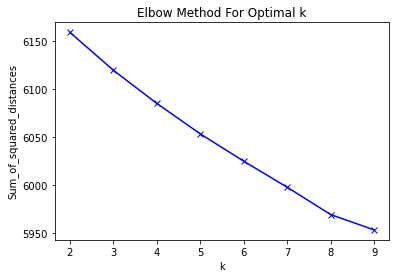

In [62]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [63]:
title = df['title'].tolist()

In [66]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])

In [67]:
cls = wiki_cl.sort_values(by=['cluster'])

In [68]:
cls['cluster'].value_counts()

1    3124
7    1062
4     956
3     703
0     568
5     211
6     192
2     141
Name: cluster, dtype: int64

Cluster: 0
Titles
                                                                                                                Costa Rica&quot;Tarrazu&quot; SWP Decaf Coffee, 1 lb Whole Bean FlavorSeal Vacuum Bag
                                                                                                                                                 Lee Kum Kee Chiu Chow Chili Oil net wt. 205g (7.2oz)
                                                                                                                                                   igourmet's Favorites - 8 Cheese Sampler (56 ounce)
                                                                                                                                                                     Diamond Glazed Pecans, 5.5-Ounce
                                                                                                                                                                               Materva Soda, 6

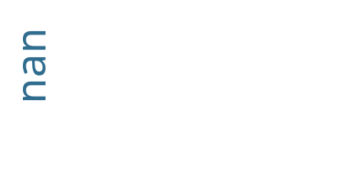

Cluster: 1
Titles
                                                                                                                                                                                               PowerBar Performance Energy Bar, Chocolate, 2.29-Ounce Bars (Pack of 24)
                                                                                                                                                                                                                                Njoy Sugar, 20 Oz. Canisters, Pack Of 3
                                                                                                                                                                                                    Pilon Gourmet Whole Bean Restaurant Blend Espresso Coffee, 16 Ounce
                                                                                                                                                                                    Chef Paul 

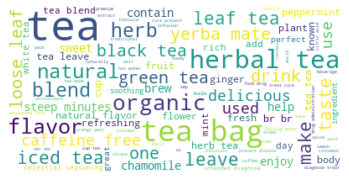

Cluster: 2
Titles
                                                                                                                                                                 CK Products No.1 Sanding Sugar, Orange
                                                                                                                                                                Ashbys Raspberry Tea Bags, 20 Count Box
                                                                                                                                                          Seagrams's Ginger Ale, 12 oz Can (Pack of 24)
                                                                                                                                                         CK Products 4 Ounce Sanding Sugar Bottle, Gold
                                                                                                                        Elsa Aged Balsamic Vinegar of Modena, Vecchia Era, Aged 12 Yea

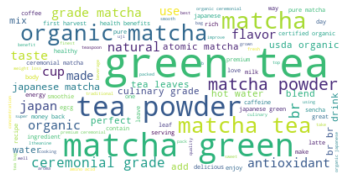

Cluster: 3
Titles
                                                                                                                       Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
                                                                                                                                Wilton Jimmies Rainbow Sprinkle Assortment, 3.2 oz. - Cake Decorating Supplies
                                                                                                                                                                   Wilton Icing Colors, 1-Ounce, Golden Yellow
                                                                                                                                                                  Wilton 603-1236 Liquid Color, 2-Ounce, White
                                                                                                                                                          

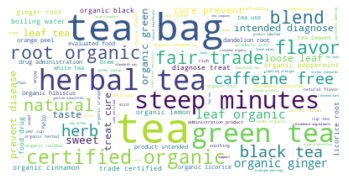

Cluster: 4
Titles
                                                                                                                                                           Nutrela High Protein Soya Chunks 200g (Pack of 6)
                                                                                                                                            Organo Gold Cafe Supreme 100% Certified Ganoderma Extract Sealed
                                                                                                                                                 Goya Stuffed Olive with Minced Tuna 5.25 ounces (PACK OF 2)
                                                                                                                           Traditional Medicinals Organic Breathe Easy Seasonal Tea, 16 Tea Bags (Pack of 6)
                                                                                                                                                   Lenox Wedding P

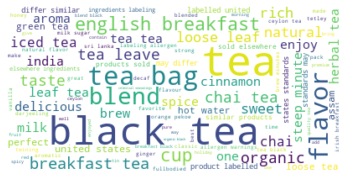

Cluster: 5
Titles
                                                                                                                     Wilton 703-1314 Food Decorative Cake Sparkles, Blue
                                                                                                                                          Yellow California Peaches, 1lb
                                                                                                                                    No-Sulphur California Apricots, 5lbs
                                                                                                                                               Pitted Bing Cherries, 1lb
                                                                                                                      Red Buffalo Banana Foster Coffee, Ground, 12 ounce
                                                                                                                     Red Buffalo Amaretto

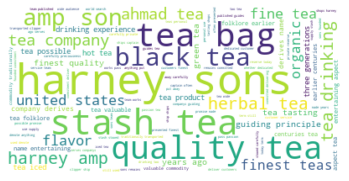

Cluster: 6
Titles
                                                                                                                                                    Mae Ploy Green Curry Paste, 14 oz
                                                                                                                 Ricola Cough Suppressant Throat Drops, Swiss Herb, Sugar Free, 19 ct
                                                                                                               Pirouline Rolled Wafers, Chocolate Hazelnut, 14-Ounce Tins (Pack of 6)
                                                                                                                      Starbucks Decaf House Blend Ground Coffee, 12 Ounce (Pack of 6)
                                                                                                                                               Kikkoman Sauce Tempura, 10 Fluid Ounce
                                                                        

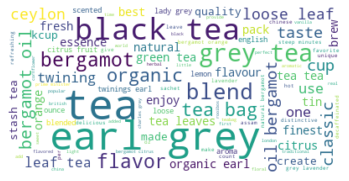

Cluster: 7
Titles
                                                                                                                                                                                      Trim Healthy Mama Xylitol
                                                                                                                                                                     Lipton Yellow Label Tea (loose tea) - 450g
                                                                                                                                                EAS Myoplex Original Nutrition Shake, Vanilla Cream, Pack of 42
                                                                                                                                                                Espressione 100% Arabica Coffee, 150-Count Pods
                                                                                                                                                      

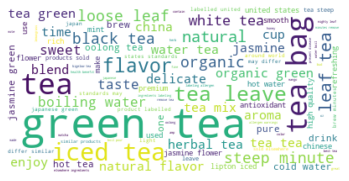

In [70]:


from wordcloud import WordCloud


result={'cluster':labels,'wiki':tea_corpus}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()